In [7]:
import numpy as np  
from sklearn.cross_decomposition import PLSRegression, PLSSVD
import pandas as pd          
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error , r2_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis= 1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [10]:
ridge_model

Ridge(alpha=0.1)

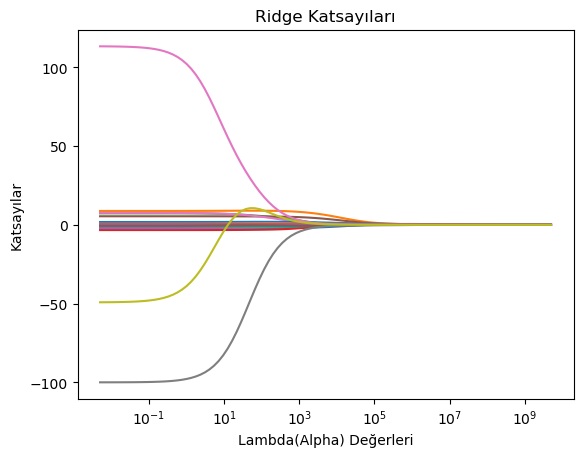

In [11]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
      ridge_model.set_params(alpha = i)
      ridge_model.fit(X_train,y_train)
      katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar , katsayilar)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar")
plt.title ("Ridge Katsayıları");

### Predict

In [13]:
y_pred = ridge_model.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred)) ### alpha 0.1

357.0517922282843

### Model Tuning

In [32]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [36]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring = "neg_mean_squared_error")

In [44]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [48]:
ridge_cv.alpha_

2018508.6292982749

In [50]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)

In [52]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

387.66724377389795